In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, cluster, silhouette_samples, silhouette_score
from sklearn.preprocessing import scale, MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot

In [3]:
data_dir = "./../new_dataset/"
data = pd.read_csv(data_dir + "Cleaned-Data.csv")

In [4]:
# label = data["infectionProb"]

In [5]:
data

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [6]:
data.loc[data['Gender_Male'] == 1, 'gender'] = 0
data.loc[data['Gender_Female'] == 1, 'gender'] = 1
data.loc[data['Gender_Transgender'] == 1, 'gender'] = 2

In [7]:
data.loc[data['Severity_None'] == 1, 'severity'] = 0
data.loc[data['Severity_Mild'] == 1, 'severity'] = 1
data.loc[data['Severity_Moderate'] == 1, 'severity'] = 2
data.loc[data['Severity_Severe'] == 1, 'severity'] = 3

In [8]:
data.loc[data['Age_0-9'] == 1, 'age_group'] = 0
data.loc[data['Age_10-19'] == 1, 'age_group'] = 1
data.loc[data['Age_20-24'] == 1, 'age_group'] = 2
data.loc[data['Age_25-59'] == 1, 'age_group'] = 3
data.loc[data['Age_60+'] == 1, 'age_group'] = 4

In [9]:
data1 = data.drop(["Contact_Dont-Know", "Contact_No", "Contact_Yes", "Country", 'Gender_Male', 'Gender_Female', 'Gender_Transgender', 'Severity_None', 'Severity_Mild', 'Severity_Moderate', 'Severity_Severe', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'], axis = 1)

In [10]:
data1

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,gender,severity,age_group
0,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
1,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
2,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
3,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0
4,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0
316796,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0
316797,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0
316798,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0


In [11]:
data1.dropna(axis=0, inplace = True)

# Data Visalisation

<AxesSubplot:xlabel='age_group', ylabel='count'>

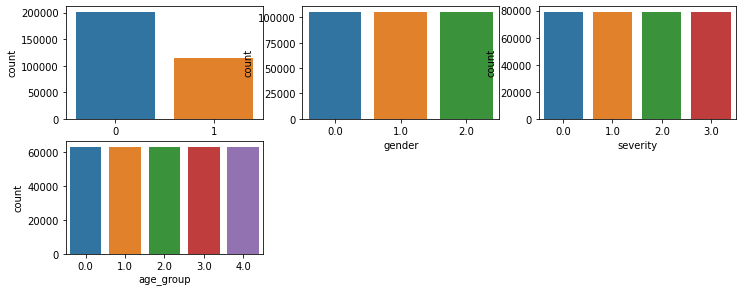

In [12]:
plt.figure(figsize=[12,12])
# plt.subplot(531)
# sns.countplot(x= "Fever", data= data)
# plt.subplot(532)
# sns.countplot(x= "Tiredness", data= data)
# plt.subplot(533)
# sns.countplot(x= "Dry-Cough", data= data)
# plt.subplot(534)
# sns.countplot(x= "Difficulty-in-Breathing", data= data)
# plt.subplot(535)
# sns.countplot(x= "Sore-Throat", data= data)
# plt.subplot(536)
# sns.countplot(x= "None_Sympton", data= data)
# plt.subplot(537)
# sns.countplot(x= "Pains", data= data)
# plt.subplot(538)
# sns.countplot(x= "Nasal-Congestion", data= data)
# plt.subplot(539)
# sns.countplot(x= "Runny-Nose", data= data)
plt.subplot(531)
sns.countplot(x= "Diarrhea", data= data1)
plt.subplot(532)
sns.countplot(x= "gender", data= data1)
plt.subplot(533)
sns.countplot(x= "severity", data= data1)
plt.subplot(534)
sns.countplot(x= "age_group", data= data1)

<AxesSubplot:>

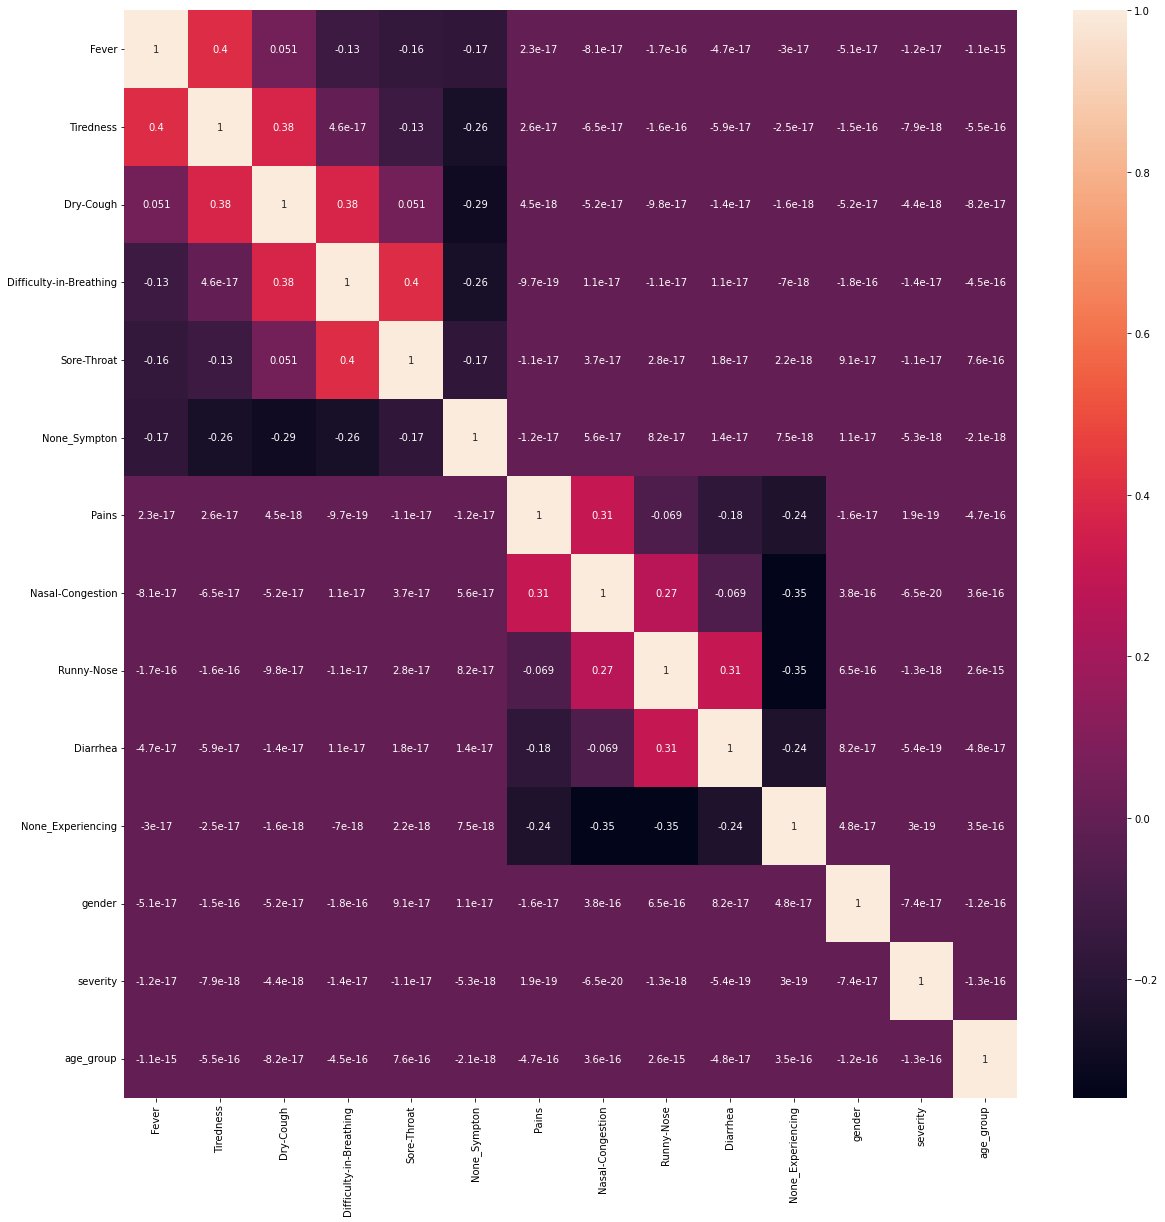

In [14]:
plt.figure(figsize=[20,20])
sns.heatmap(data1.corr(), annot=True)

In [15]:
data1

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,gender,severity,age_group
0,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
1,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
2,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
3,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0
4,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0
316796,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0
316797,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0
316798,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0


In [16]:
scaled_data = scale(data1)

In [17]:
# scaled_data1 = scaled_data[:50000, :]

In [18]:
scaled_data.shape

(316800, 14)

# Three Clusters

In [34]:
model = KMeans(n_clusters=3, random_state=42)

In [35]:
model.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [36]:
model.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
silhouette_score(scaled_data, model.labels_)

0.1248144094244934

In [37]:
data1["condition"] = model.labels_

<AxesSubplot:xlabel='condition', ylabel='count'>

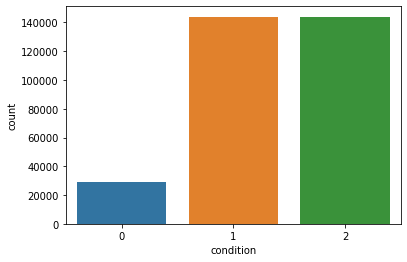

In [38]:
sns.countplot(x = "condition", data= data1)

<AxesSubplot:xlabel='severity', ylabel='count'>

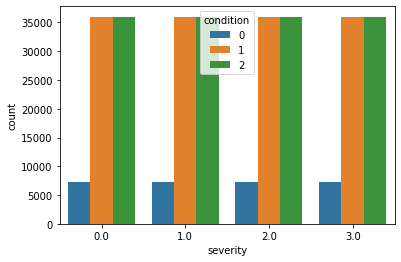

In [46]:
sns.countplot(x= "severity", hue = "condition", data= data1)

In [29]:
data1.to_csv("long_short_covid_data1(3clus).csv", index = False)

# Two Clusters

In [25]:
model12 = KMeans(n_clusters=2, random_state=42)

In [26]:
model12.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [27]:
model12.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
silhouette_score(scaled_data, model12.labels_)

0.10037232911371123

In [28]:
data1["long_covid"] = model12.labels_

<AxesSubplot:xlabel='severity', ylabel='count'>

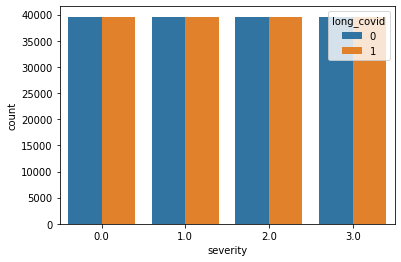

In [29]:
sns.countplot(x= "severity", hue = "long_covid", data= data1)

<AxesSubplot:xlabel='long_covid', ylabel='count'>

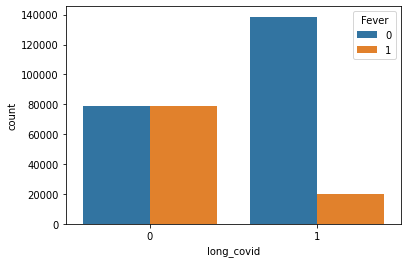

In [30]:
sns.countplot(x= "long_covid", hue = "Fever", data= data1)

<AxesSubplot:xlabel='long_covid', ylabel='count'>

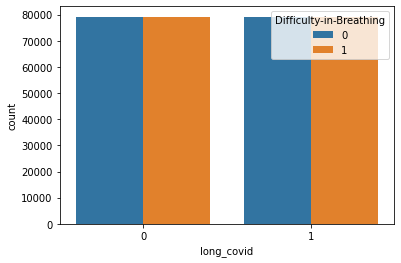

In [31]:
sns.countplot(x= "long_covid", hue = "Difficulty-in-Breathing", data= data1)

# Classification

In [32]:
data1

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,gender,severity,age_group,long_covid
0,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0,0
1,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0,0
2,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0,0
3,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0,0
4,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0,1
316796,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0,1
316797,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0,1
316798,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0,1


In [39]:
data2 = data1.drop(["long_covid", "condition"], axis = 1)

In [40]:
data2

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,gender,severity,age_group
0,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
1,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
2,1,1,1,1,1,0,1,1,1,1,0,0.0,1.0,0.0
3,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0
4,1,1,1,1,1,0,1,1,1,1,0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0
316796,0,0,0,0,0,1,0,0,0,0,1,2.0,3.0,4.0
316797,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0
316798,0,0,0,0,0,1,0,0,0,0,1,2.0,0.0,4.0


In [42]:
data2.dropna(axis=0, inplace = True)

<AxesSubplot:xlabel='severity', ylabel='count'>

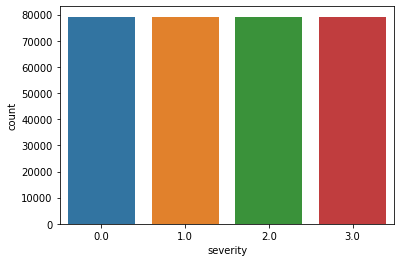

In [43]:
sns.countplot(x= "severity", data= data2)

In [44]:
X = data2.drop("severity", axis = 1).values

In [45]:
X.shape

(316800, 13)

In [46]:
y = data2["severity"].values

In [47]:
y.shape

(316800,)

In [48]:
y = pd.get_dummies(y).values

In [49]:
y.shape

(316800, 4)

In [50]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=56)

In [51]:
scaler = MinMaxScaler()

In [52]:
X = scaler.fit_transform(train_X)

In [53]:
testX = scaler.transform(test_X)

# Scale

In [54]:
X2 = scale(train_X)

In [55]:
testX2 = scale(test_X)

In [56]:
X2.shape

(253440, 13)

In [57]:
train_y.shape

(253440, 4)

# Model

In [58]:
model = Sequential()

model.add(Dense(512, activation="relu"))

model.add(Dense(256, activation="relu"))

model.add(Dense(128, activation="relu"))

model.add(Dense(64, activation="relu"))

model.add(Dense(32, activation="relu"))

model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer = "adam",
             metrics=["accuracy"])

In [61]:
early_stop = EarlyStopping(monitor="val_loss", patience=100) 

In [62]:
model.fit(x= X2, y= train_y, epochs = 150, validation_data = (testX2, test_y), callbacks=[early_stop], batch_size = 32)

Epoch 1/150
7920/7920 [==============================] - 22s 3ms/step - loss: 1.3864 - accuracy: 0.2503 - val_loss: 1.3864 - val_accuracy: 0.2485
Epoch 2/150
7920/7920 [==============================] - 22s 3ms/step - loss: 1.3864 - accuracy: 0.2504 - val_loss: 1.3864 - val_accuracy: 0.2498
Epoch 3/150
7920/7920 [==============================] - 24s 3ms/step - loss: 1.3864 - accuracy: 0.2494 - val_loss: 1.3863 - val_accuracy: 0.2485
Epoch 4/150
7920/7920 [==============================] - 23s 3ms/step - loss: 1.3864 - accuracy: 0.2506 - val_loss: 1.3863 - val_accuracy: 0.2501
Epoch 5/150
7920/7920 [==============================] - 22s 3ms/step - loss: 1.3864 - accuracy: 0.2485 - val_loss: 1.3863 - val_accuracy: 0.2485
Epoch 6/150
7920/7920 [==============================] - 22s 3ms/step - loss: 1.3864 - accuracy: 0.2491 - val_loss: 1.3864 - val_accuracy: 0.2485
Epoch 7/150
7920/7920 [==============================] - 20s 3ms/step - loss: 1.3864 - accuracy: 0.2493 - val_loss: 1.3864 -

Epoch 57/150
7920/7920 [==============================] - 17s 2ms/step - loss: 1.3864 - accuracy: 0.2491 - val_loss: 1.3864 - val_accuracy: 0.2498
Epoch 58/150
7920/7920 [==============================] - 17s 2ms/step - loss: 1.3864 - accuracy: 0.2495 - val_loss: 1.3866 - val_accuracy: 0.2501
Epoch 59/150
7920/7920 [==============================] - 18s 2ms/step - loss: 1.3864 - accuracy: 0.2497 - val_loss: 1.3864 - val_accuracy: 0.2485
Epoch 60/150
7920/7920 [==============================] - 17s 2ms/step - loss: 1.3864 - accuracy: 0.2495 - val_loss: 1.3863 - val_accuracy: 0.2516
Epoch 61/150
7920/7920 [==============================] - 17s 2ms/step - loss: 1.3864 - accuracy: 0.2498 - val_loss: 1.3863 - val_accuracy: 0.2498
Epoch 62/150
7920/7920 [==============================] - 17s 2ms/step - loss: 1.3864 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2516
Epoch 63/150
7920/7920 [==============================] - 19s 2ms/step - loss: 1.3864 - accuracy: 0.2504 - val_loss: 1

In [240]:
model.evaluate(testX2)

1980/1980 [==============================] - 3s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [63]:
pred = model.predict(testX)

In [64]:
pred1 = np.argmax(pred, axis=-1)

In [65]:
testingLabel = np.argmax(test_y, axis=-1)

In [66]:
pred

array([[0.25234595, 0.25015032, 0.24517658, 0.2523272 ],
       [0.25234595, 0.25015032, 0.24517658, 0.2523272 ],
       [0.25234595, 0.25015032, 0.24517658, 0.2523272 ],
       ...,
       [0.25234595, 0.25015032, 0.24517658, 0.2523272 ],
       [0.25234595, 0.25015032, 0.24517658, 0.2523272 ],
       [0.25234595, 0.25015032, 0.24517658, 0.2523272 ]], dtype=float32)

In [67]:
print(classification_report(testingLabel, pred1))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40     15848
           1       0.00      0.00      0.00     15745
           2       0.00      0.00      0.00     15828
           3       0.00      0.00      0.00     15939

    accuracy                           0.25     63360
   macro avg       0.06      0.25      0.10     63360
weighted avg       0.06      0.25      0.10     63360



C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ushou\Downloads\Data Science and AI\MSc Project\project_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

<AxesSubplot:>

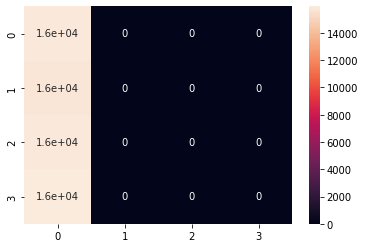

In [71]:
cm = confusion_matrix(testingLabel, pred1)
sns.heatmap(cm, annot = True)

""
